In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

In [12]:
# Generate data set using sci kit leran
X,y = make_regression(n_samples=1000,n_features=2,n_informative=2
                      ,noise=10,random_state=1)

print(X.shape,y.shape)

(1000, 2) (1000,)


<IPython.core.display.Javascript object>


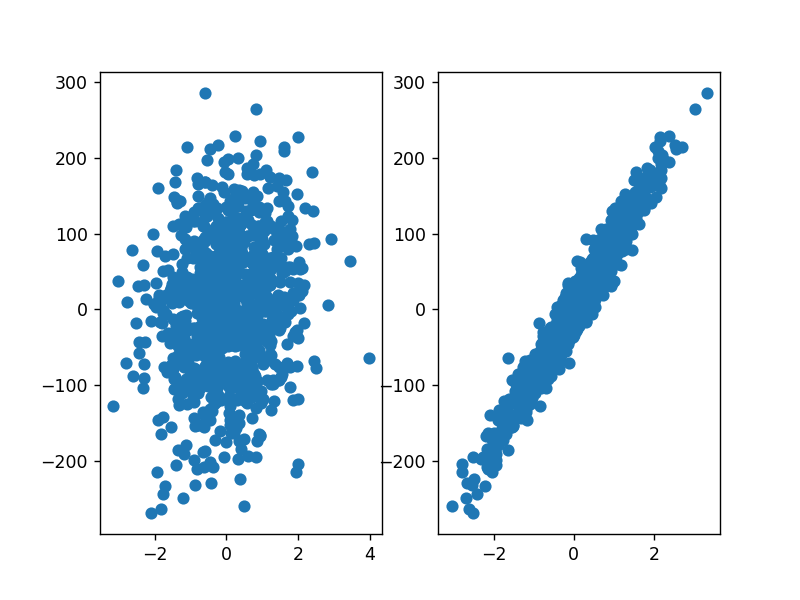

In [13]:
plt.subplot(1,2,1)
plt.scatter(X[:,0],y)

plt.subplot(1,2,2)
plt.scatter(X[:,1],y)

<IPython.core.display.Javascript object>


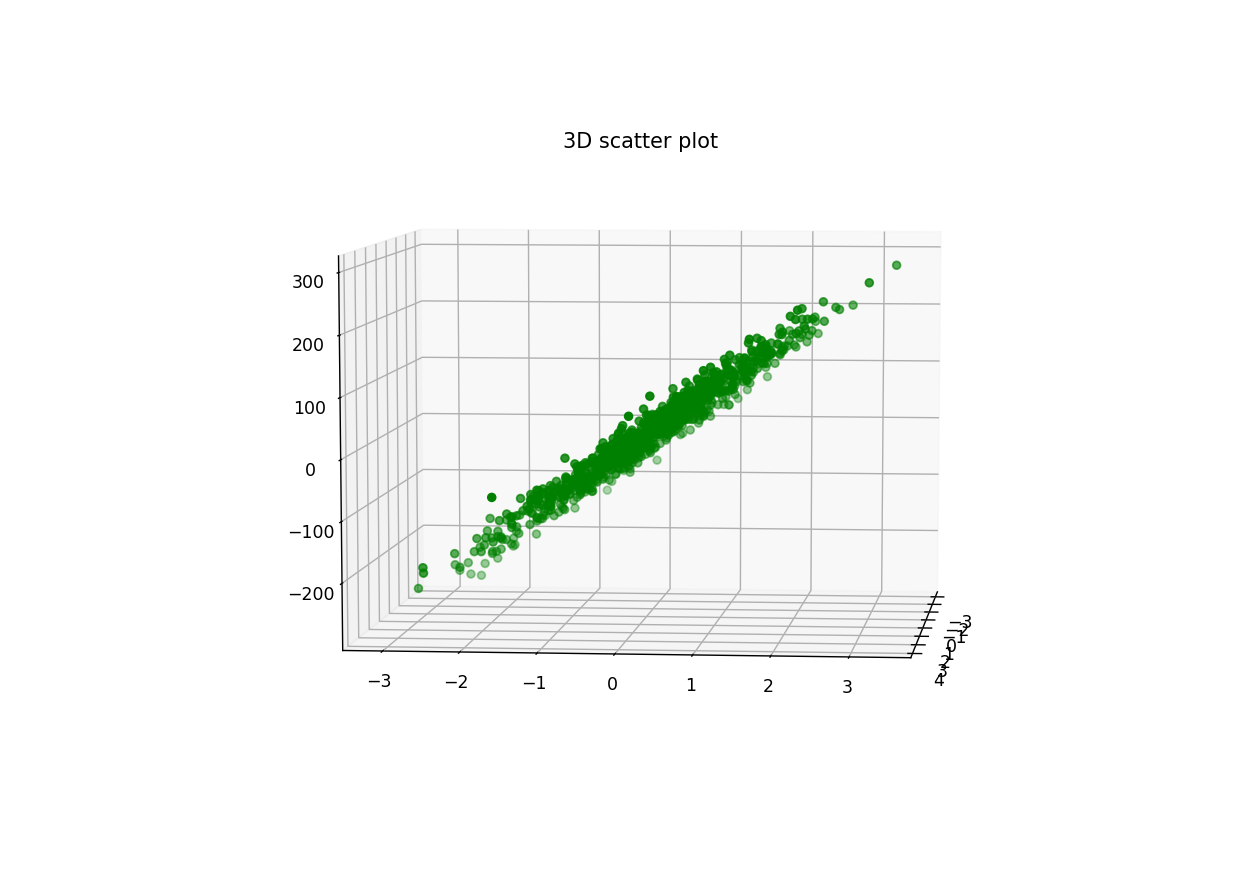

In [14]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(X[:,0],X[:,1],y,color='green')
plt.title("3D scatter plot")
plt.show()

In [ ]:
# we can see that a plane can fit the data, hence we have to find a hyper plane

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.coef_ #theta[0,1]

array([16.62437639, 87.99042847])

In [18]:
model.intercept_  # theta0

-0.2176641376001851

In [19]:
model.predict([X[0],X[1]]) # predicted values of y[0] and y[1]

array([-186.58153868,  -90.66624357])

In [21]:
y[0] ,y[1]  #actual values of y[0] and y[1]

(-198.36714169030483, -71.87770558832477)

In [22]:
model.score(X,y)  #score of model

0.988401838483157

# Mini Batch Gradient Descent

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [67]:
# Get or Create a Datasets
X,y = make_regression(n_samples=10000,n_features=20,n_informative=20, noise=10,random_state=1)

# Normalisation
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std

In [68]:
# Add a column of 1s for vectorisation
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [69]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad =  np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m
# BAtch GD
def gradient_descent(X,y,learning_rate=0.01,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Batch Gradient Descent -> compute Gradient wrt to entire dataset
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
    return theta,error_list

In [75]:
def batch_gradient_descent(X,y,batch_size=200,learning_rate=0.01,max_iters=10):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    data = np.hstack((X,y.reshape(-1,1))) # conveting vector into matrix
    
    for i in range(max_iters):
        # Mini Batch Gradient Descent -> compute Gradient wrt to entire dataset
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m//batch_size
        
        for i in range(total_batches):
            batch_data = data[i*batch_size : (i+1)*batch_size,:]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = theta - learning_rate*batch_gradient
            
            e = error(x_batch,y_batch,theta)
            error_list.append(e)
            
    return theta,error_list

102.59072547218668


<IPython.core.display.Javascript object>


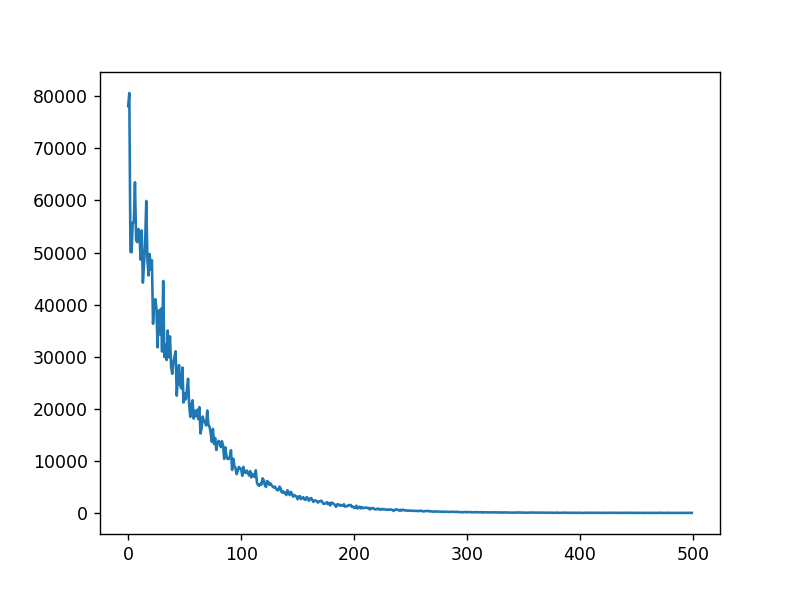

In [76]:
# Results of Mini- Batch Gradient Descent - 300 Iterations, learning_rate=0.01
theta , error_list = batch_gradient_descent(X,y)

final_error = error_list[-1]
print(final_error)
plt.figure()
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

264.08329543338755


<IPython.core.display.Javascript object>


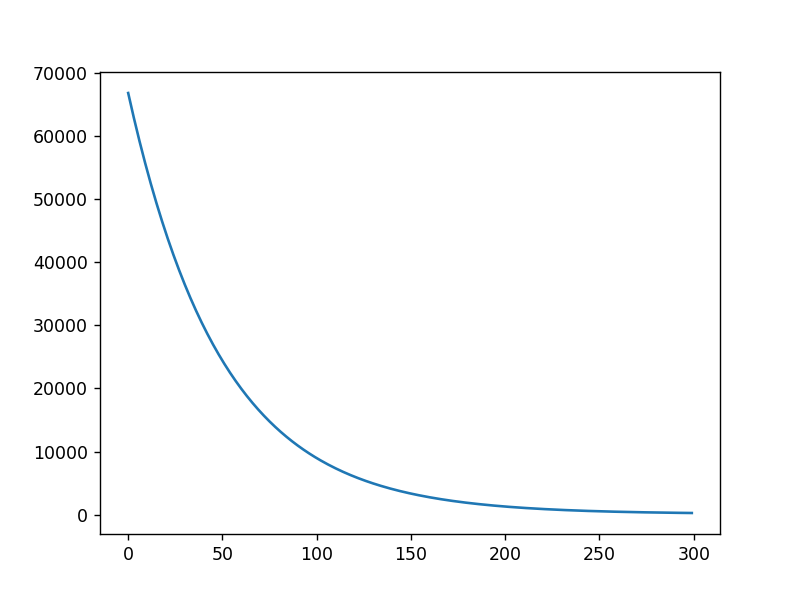

In [77]:
# Results of Batch Gradient Descent - 300 Iterations, learning_rate=0.01
theta , error_list = gradient_descent(X,y)
final_error = error_list[-1]
print(final_error)
plt.figure()
plt.plot(np.arange(len(error_list)),error_list)
plt.show()

In [ ]:
Advantages of MBGD:-
-> Mini - Batch GD helps to avoid local minima
-> Vectoriztion can be done 
-> No need to load entire data
-> Faster convergence